# Detection Of Movies Collection

In [3]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Movie_regression.xls")
data

Marketing expense  Production expense  Multiplex coverage     Budget  \
0              20.1264               59.62               0.462  36524.125   
1              20.5462               69.14               0.531  35668.655   
2              20.5458               69.14               0.531  39912.675   
3              20.6474               59.36               0.542  38873.890   
4              21.3810               59.36               0.542  39701.585   
..                 ...                 ...                 ...        ...   
501            21.2526               78.86               0.427  36624.115   
502            20.9054               78.86               0.427  33996.600   
503            21.2152               78.86               0.427  38751.680   
504            22.1918               78.86               0.427  37740.670   
505            20.9482               78.86               0.427  33496.650   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0           138.7               7.825                8.095            7.910   
1           152.4               7.505                7.650            7.440   
2           134.6               7.485                7.570            7.495   
3           119.3               6.895                7.035            6.920   
4           127.7               6.920                7.070            6.815   
..            ...                 ...                  ...              ...   
501         142.6               8.680                8.775            8.620   
502         150.2               8.780                8.945            8.770   
503         164.5               8.830                8.970            8.855   
504         162.8               8.730                8.845            8.800   
505         154.3               8.640                8.880            8.680   

     Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0              7.995           7.94         527367          YES      109.60   
1              7.470           7.44         494055           NO      146.64   
2              7.515           7.44         547051           NO      147.88   
3              7.020           8.26         516279          YES      185.36   
4              7.070           8.26         531448           NO      176.48   
..               ...            ...            ...          ...         ...   
501            8.970           6.80         492480           NO      186.96   
502            8.930           7.80         482875          YES      132.24   
503            9.010           7.80         532239           NO      109.56   
504            8.845           6.80         496077          YES      158.80   
505            8.790           6.80         518438          YES      205.60   

     Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  
0            223.840  Thriller              23            494       48000  
1            243.456     Drama              42            462       43200  
2           2022.400    Comedy              38            458       69400  
3            225.344     Drama              45            472       66800  
4            225.792     Drama              55            395       72400  
..               ...       ...             ...            ...         ...  
501          243.584    Action              27            561       44800  
502          263.296    Action              20            600       41200  
503          243.824    Comedy              31            576       47800  
504          303.520    Comedy              47            607       44000  
505          203.040    Comedy              45            604       38000  

[506 rows x 18 columns]

In [5]:
# basic checks 
data.head()

Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   
1            20.5462               69.14               0.531  35668.655   
2            20.5458               69.14               0.531  39912.675   
3            20.6474               59.36               0.542  38873.890   
4            21.3810               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0            7.995           7.94         527367          YES      109.60   
1            7.470           7.44         494055           NO      146.64   
2            7.515           7.44         547051           NO      147.88   
3            7.020           8.26         516279          YES      185.36   
4            7.070           8.26         531448           NO      176.48   

   Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  
0          223.840  Thriller              23            494       48000  
1          243.456     Drama              42            462       43200  
2         2022.400    Comedy              38            458       69400  
3          225.344     Drama              45            472       66800  
4          225.792     Drama              55            395       72400

In [6]:
data.tail()

Marketing expense  Production expense  Multiplex coverage     Budget  \
501            21.2526               78.86               0.427  36624.115   
502            20.9054               78.86               0.427  33996.600   
503            21.2152               78.86               0.427  38751.680   
504            22.1918               78.86               0.427  37740.670   
505            20.9482               78.86               0.427  33496.650   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
501         142.6                8.68                8.775            8.620   
502         150.2                8.78                8.945            8.770   
503         164.5                8.83                8.970            8.855   
504         162.8                8.73                8.845            8.800   
505         154.3                8.64                8.880            8.680   

     Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
501            8.970            6.8         492480           NO      186.96   
502            8.930            7.8         482875          YES      132.24   
503            9.010            7.8         532239           NO      109.56   
504            8.845            6.8         496077          YES      158.80   
505            8.790            6.8         518438          YES      205.60   

     Twitter_hastags   Genre  Avg_age_actors  Num_multiplex  Collection  
501          243.584  Action              27            561       44800  
502          263.296  Action              20            600       41200  
503          243.824  Comedy              31            576       47800  
504          303.520  Comedy              47            607       44000  
505          203.040  Comedy              45            604       38000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
data.describe()

Marketing expense  Production expense  Multiplex coverage  \
count         506.000000          506.000000          506.000000   
mean           92.270471           77.273557            0.445305   
std           172.030902           13.720706            0.115878   
min            20.126400           55.920000            0.129000   
25%            21.640900           65.380000            0.376000   
50%            25.130200           74.380000            0.462000   
75%            93.541650           91.200000            0.551000   
max          1799.524000          110.480000            0.615000   

             Budget  Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  \
count    506.000000    506.000000          506.000000           506.000000   
mean   34911.144022    142.074901            8.014002             8.185613   
std     3903.038232     28.148861            1.054266             1.054290   
min    19781.355000     76.400000            3.840000             4.035000   
25%    32693.952500    118.525000            7.316250             7.503750   
50%    34488.217500    151.000000            8.307500             8.495000   
75%    36793.542500    167.575000            8.865000             9.030000   
max    48772.900000    173.500000            9.435000             9.540000   

       Director_rating  Producer_rating  Critic_rating  Trailer_views  \
count       506.000000       506.000000     506.000000     506.000000   
mean          8.019664         8.190514       7.810870  449860.715415   
std           1.059899         1.049601       0.659699   68917.763145   
min           3.840000         4.030000       6.600000  212912.000000   
25%           7.296250         7.507500       7.200000  409128.000000   
50%           8.312500         8.465000       7.960000  462460.000000   
75%           8.883750         9.030000       8.260000  500247.500000   
max           9.425000         9.635000       9.400000  567784.000000   

       Time_taken  Twitter_hastags  Avg_age_actors  Num_multiplex  \
count  494.000000       506.000000      506.000000     506.000000   
mean   157.391498       260.832095       39.181818     545.043478   
std     31.295161       104.779133       12.513697     106.332889   
min      0.000000       201.152000        3.000000     333.000000   
25%    132.300000       223.796000       28.000000     465.000000   
50%    160.000000       254.400000       39.000000     535.500000   
75%    181.890000       283.416000       50.000000     614.750000   
max    217.520000      2022.400000       60.000000     868.000000   

          Collection  
count     506.000000  
mean    45057.707510  
std     18364.351764  
min     10000.000000  
25%     34050.000000  
50%     42400.000000  
75%     50000.000000  
max    100000.000000

In [9]:
data.describe(include=["O"])

3D_available     Genre
count           506       506
unique            2         4
top             YES  Thriller
freq            279       183

# Exploratory data Analysis

In [10]:
data.head(1)

Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095             7.91   

   Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0            7.995           7.94         527367          YES       109.6   

   Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  
0           223.84  Thriller              23            494       48000

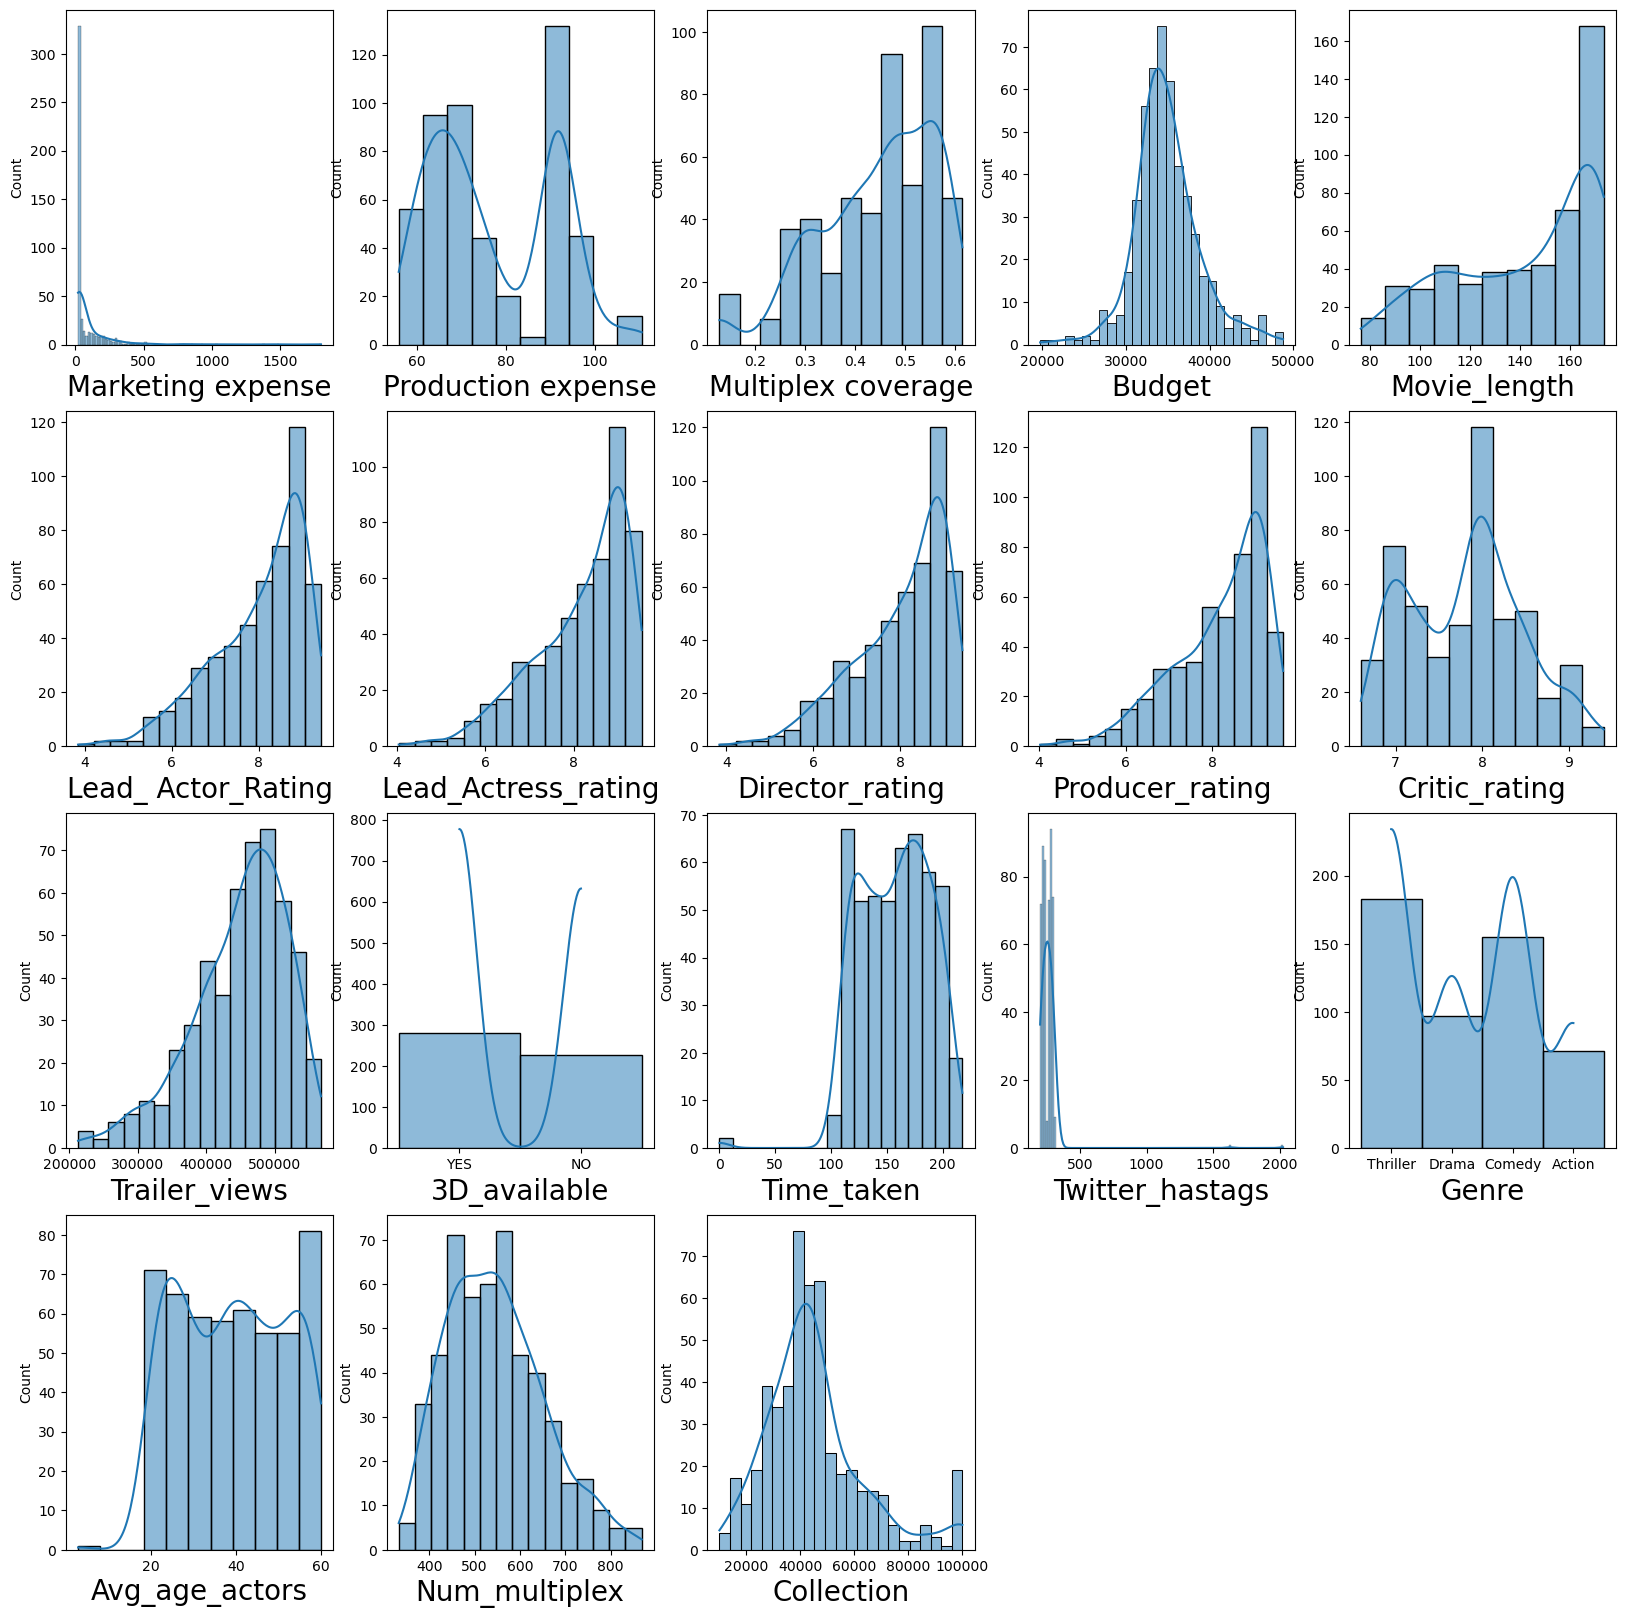

In [11]:
# univeriate analysis

plt.figure(figsize=(20,20),facecolor="white")
plotnumber = 1

for column in data:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
# Bivariate analysis


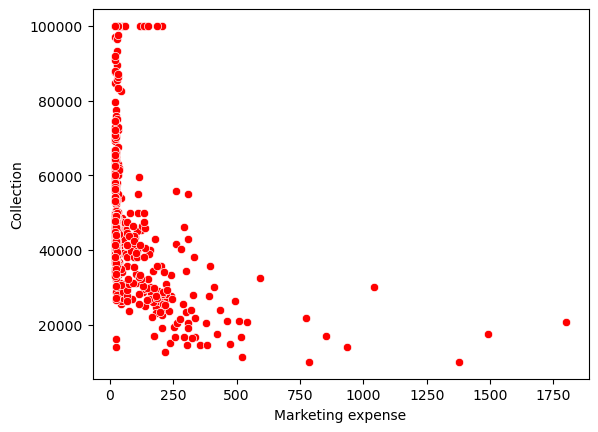

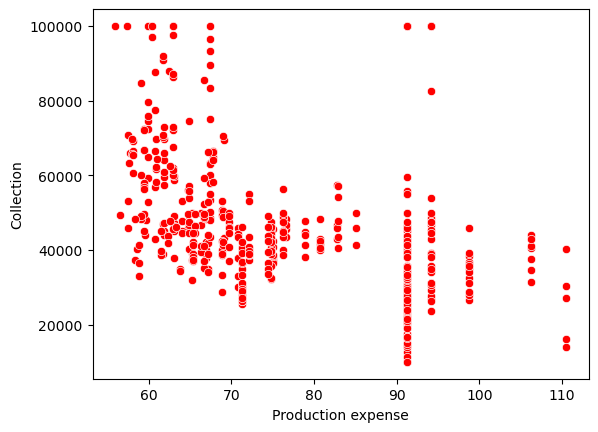

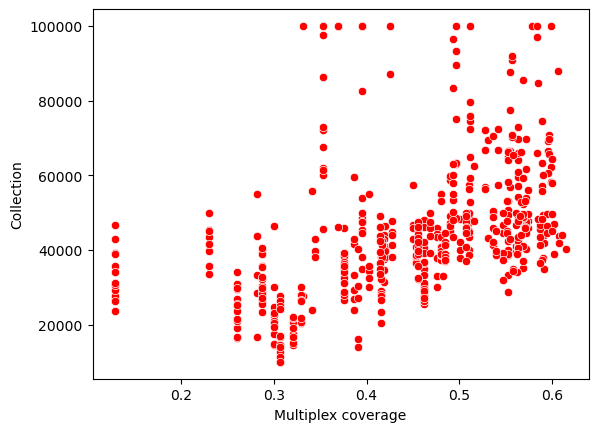

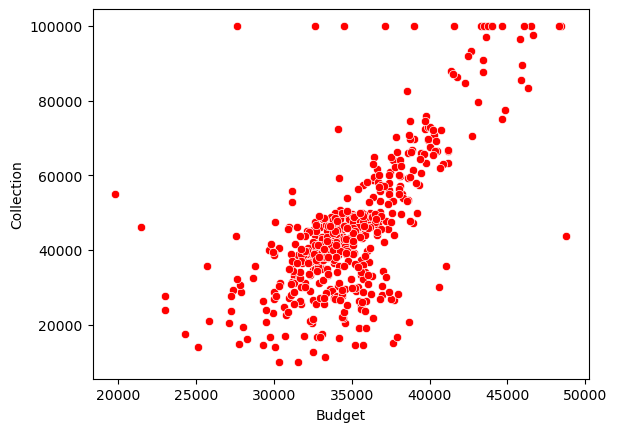

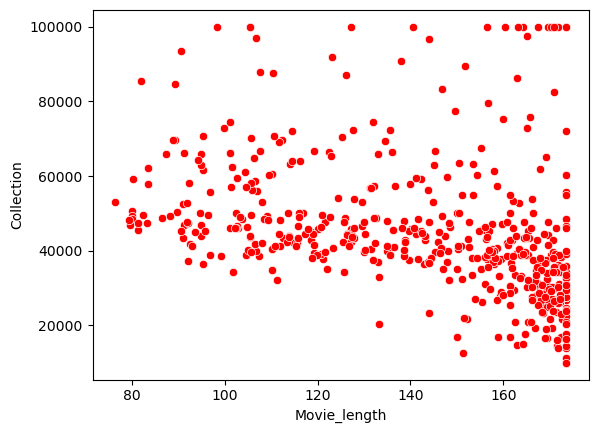

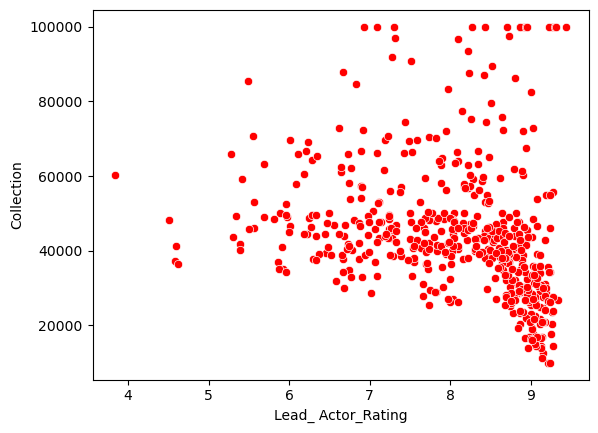

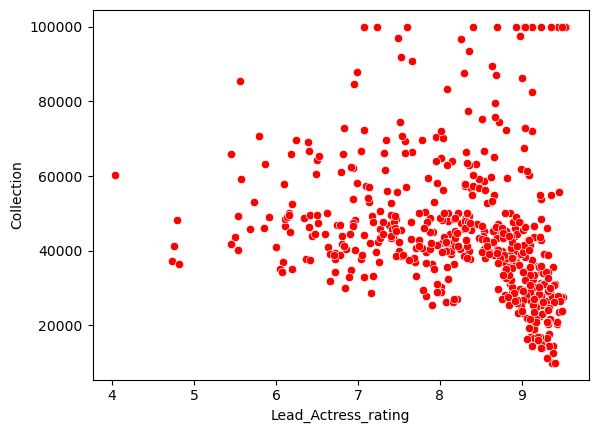

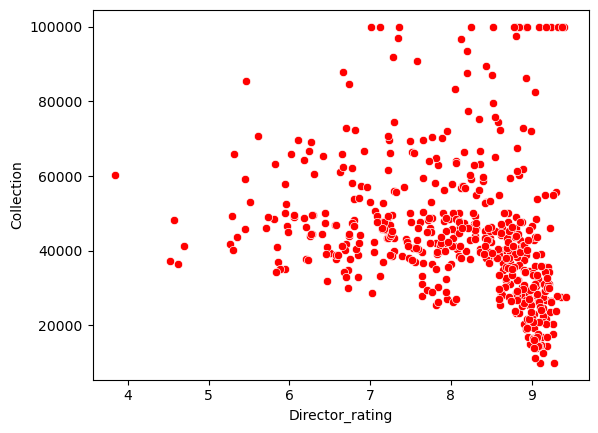

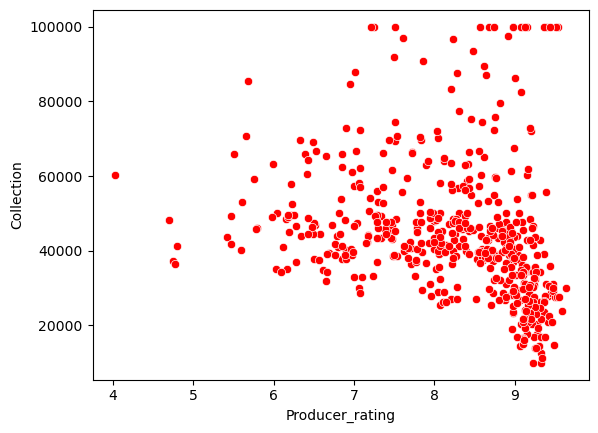

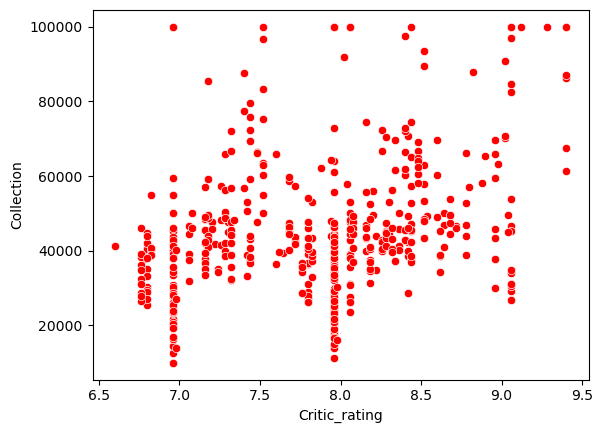

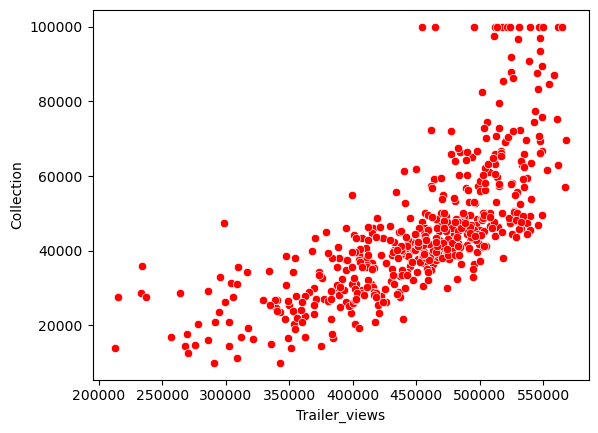

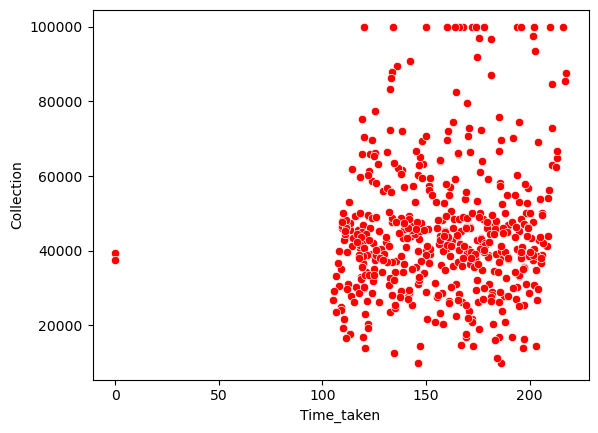

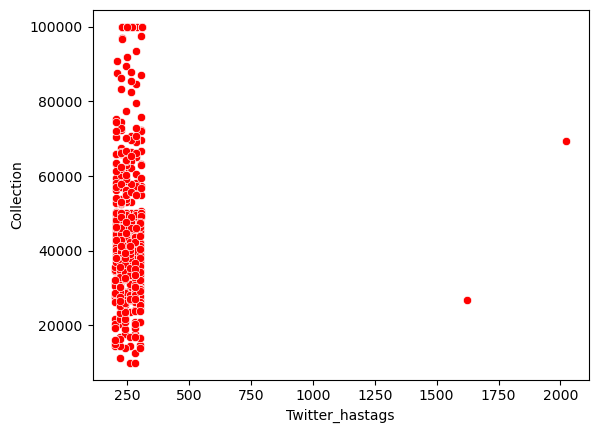

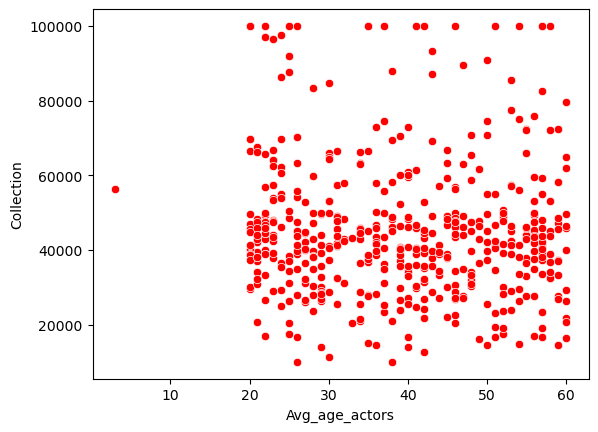

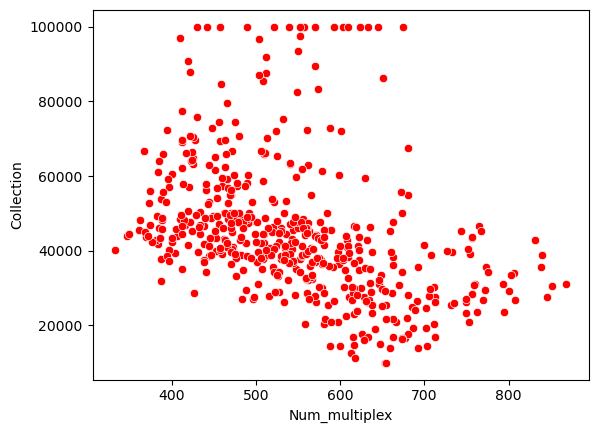

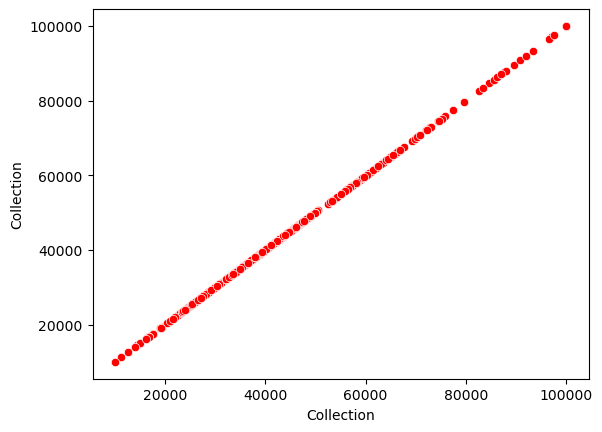

In [13]:

x = data.drop(['3D_available','Genre'],axis = 1)
for i in x.columns:
    sns.scatterplot(x = i,y = 'Collection',data = data,color = 'Red')
    plt.show()
    

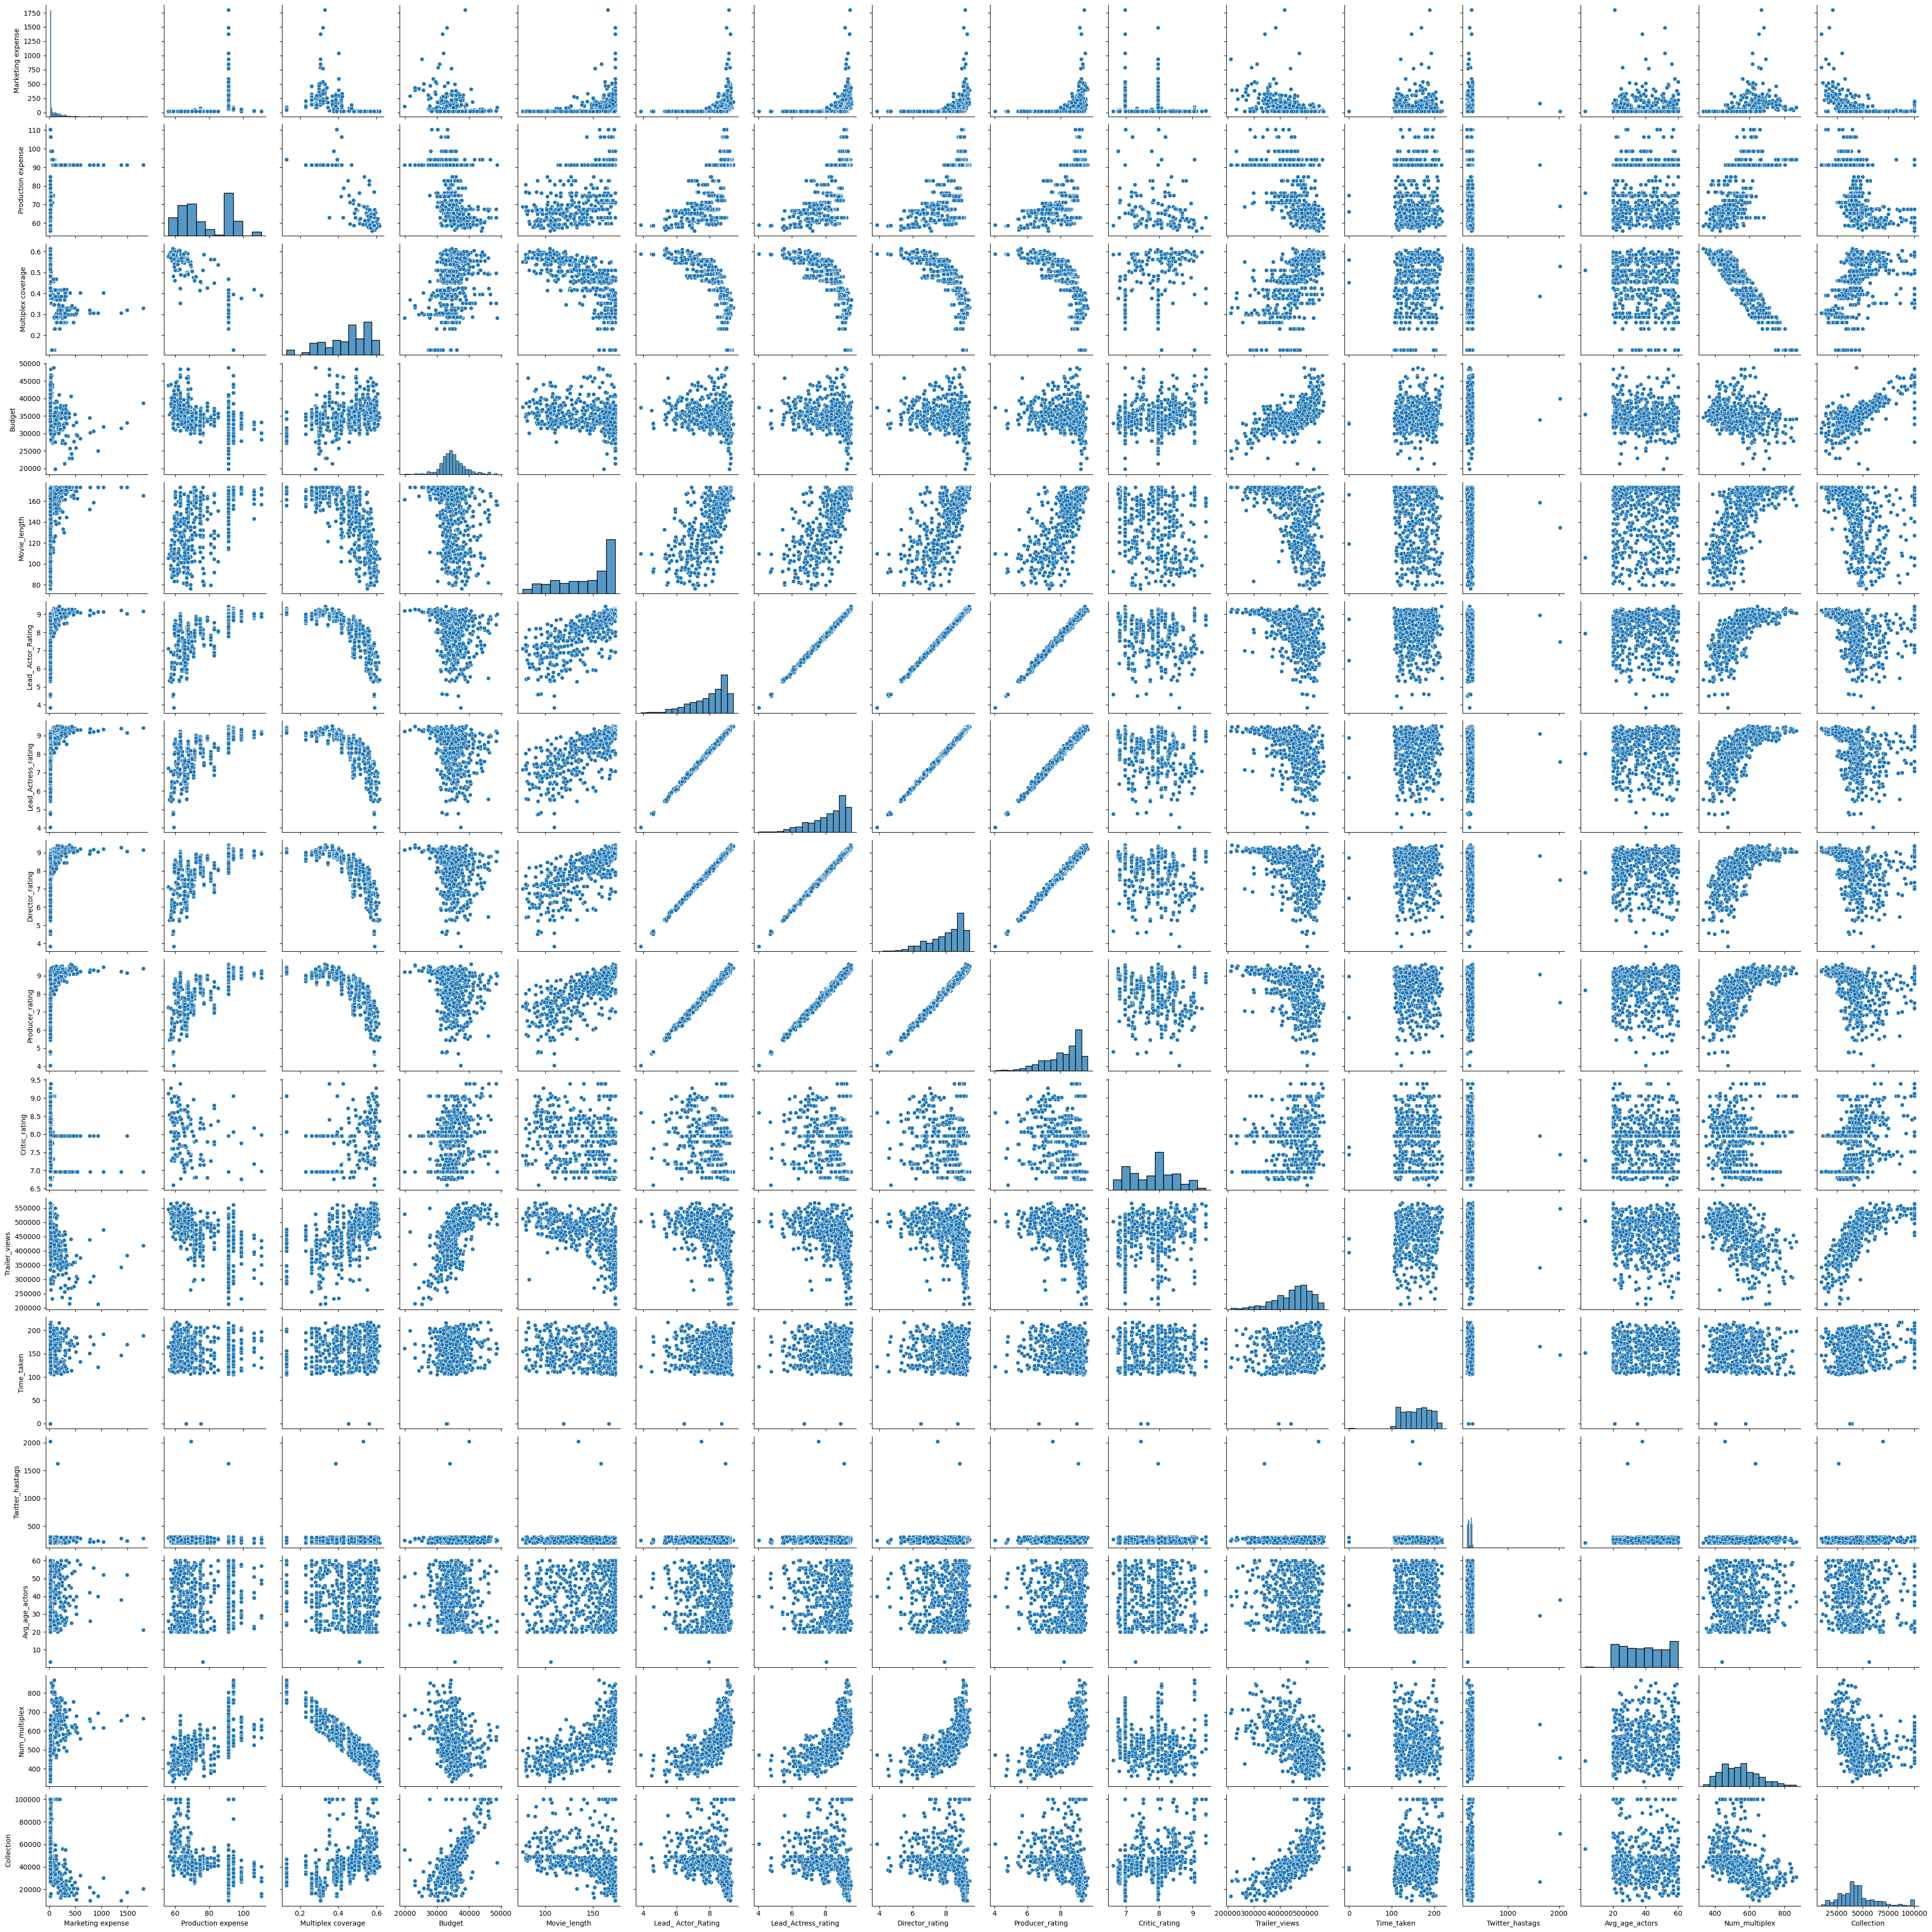

In [14]:
# multivariate analysis

sns.pairplot(data)

# data Preprocessing and Feature Engineering

In [15]:
data.head(3)

Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   
1            20.5462               69.14               0.531  35668.655   
2            20.5458               69.14               0.531  39912.675   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   

   Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0            7.995           7.94         527367          YES      109.60   
1            7.470           7.44         494055           NO      146.64   
2            7.515           7.44         547051           NO      147.88   

   Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  
0          223.840  Thriller              23            494       48000  
1          243.456     Drama              42            462       43200  
2         2022.400    Comedy              38            458       69400

In [16]:
# step 1: finding missing values
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [17]:
data["Time_taken"].fillna(data['Time_taken'].median(),inplace=True)

In [18]:
data.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

In [19]:
# step 2: converting categorical in numerical


data['3D_available'] = data["3D_available"].map({'YES':1,'NO':0})

In [20]:
data.head()

Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   
1            20.5462               69.14               0.531  35668.655   
2            20.5458               69.14               0.531  39912.675   
3            20.6474               59.36               0.542  38873.890   
4            21.3810               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  Trailer_views  3D_available  Time_taken  \
0            7.995           7.94         527367             1      109.60   
1            7.470           7.44         494055             0      146.64   
2            7.515           7.44         547051             0      147.88   
3            7.020           8.26         516279             1      185.36   
4            7.070           8.26         531448             0      176.48   

   Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  
0          223.840  Thriller              23            494       48000  
1          243.456     Drama              42            462       43200  
2         2022.400    Comedy              38            458       69400  
3          225.344     Drama              45            472       66800  
4          225.792     Drama              55            395       72400

In [21]:
data = pd.get_dummies(data=data,columns=['Genre'],drop_first=True)

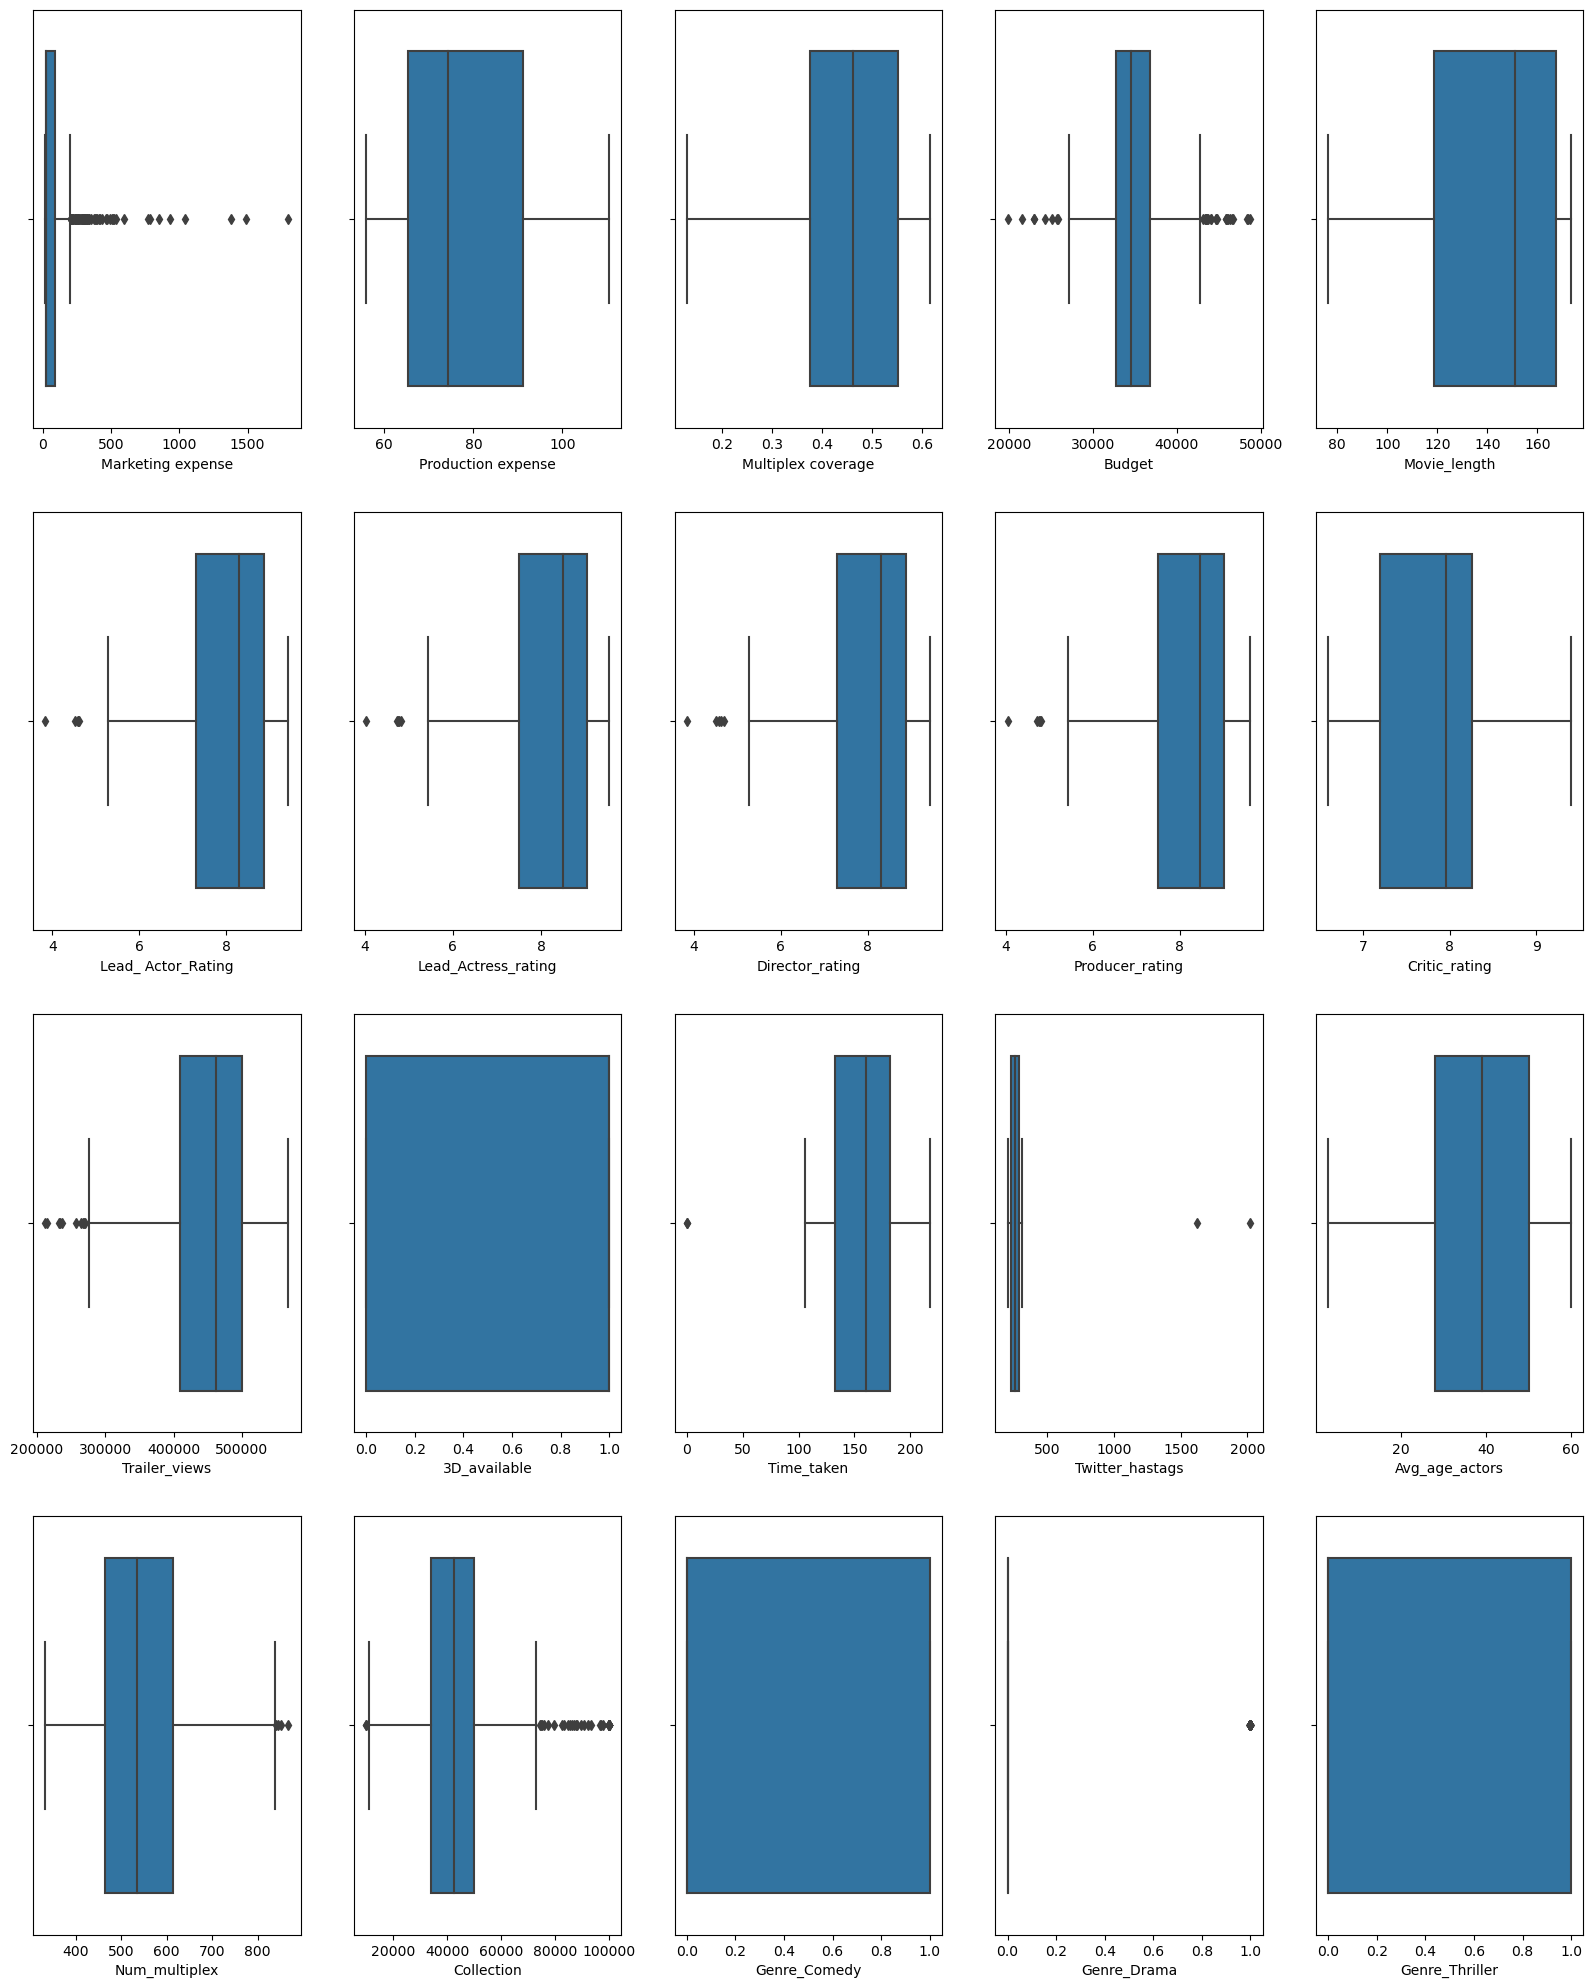

In [22]:
# step 3: checking outliers

# data1 = data.drop(columns=['3D_available','Genre'],axis=1)

plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(4,5,plotnumber)
        sns.boxplot(x=column, data=data)
    plotnumber+=1
plt.show()

In [23]:
data.head(1)

Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095             7.91   

   Producer_rating  Critic_rating  Trailer_views  3D_available  Time_taken  \
0            7.995           7.94         527367             1       109.6   

   Twitter_hastags  Avg_age_actors  Num_multiplex  Collection  Genre_Comedy  \
0           223.84              23            494       48000             0   

   Genre_Drama  Genre_Thriller  
0            0               1

In [24]:
data.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Avg_age_actors',
       'Num_multiplex', 'Collection', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Thriller'],
      dtype='object')

In [25]:
# scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [26]:
data1 = pd.DataFrame(data,columns=['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Avg_age_actors',
       'Num_multiplex', 'Collection', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Thriller'])

In [27]:
data1

Marketing expense  Production expense  Multiplex coverage    Budget  \
0             0.000000            0.067815            0.685185  0.577505   
1             0.000236            0.242302            0.827160  0.547998   
2             0.000236            0.242302            0.827160  0.694386   
3             0.000293            0.063050            0.849794  0.658555   
4             0.000705            0.063050            0.849794  0.687105   
..                 ...                 ...                 ...       ...   
501           0.000633            0.420455            0.613169  0.580954   
502           0.000438            0.420455            0.613169  0.490324   
503           0.000612            0.420455            0.613169  0.654340   
504           0.001161            0.420455            0.613169  0.619467   
505           0.000462            0.420455            0.613169  0.473079   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0        0.641607            0.712243             0.737511         0.728738   
1        0.782698            0.655049             0.656676         0.644584   
2        0.599382            0.651475             0.642144         0.654432   
3        0.441813            0.546023             0.544959         0.551477   
4        0.528321            0.550492             0.551317         0.532677   
..            ...                 ...                  ...              ...   
501      0.681771            0.865058             0.861035         0.855864   
502      0.760041            0.882931             0.891916         0.882722   
503      0.907312            0.891868             0.896458         0.897941   
504      0.889804            0.873995             0.873751         0.888093   
505      0.802266            0.857909             0.880109         0.866607   

     Producer_rating  Critic_rating  Trailer_views  3D_available  Time_taken  \
0           0.707404       0.478571       0.886108           1.0    0.503862   
1           0.613738       0.300000       0.792238           0.0    0.674145   
2           0.621766       0.300000       0.941576           0.0    0.679846   
3           0.533452       0.592857       0.854863           1.0    0.852152   
4           0.542373       0.592857       0.897608           0.0    0.811328   
..               ...            ...            ...           ...         ...   
501         0.881356       0.071429       0.787800           0.0    0.859507   
502         0.874219       0.428571       0.760733           1.0    0.607944   
503         0.888492       0.428571       0.899837           0.0    0.503678   
504         0.859054       0.071429       0.797936           1.0    0.730048   
505         0.849242       0.071429       0.860947           1.0    0.945200   

     Twitter_hastags  Avg_age_actors  Num_multiplex  Collection  Genre_Comedy  \
0           0.012457        0.350877       0.300935    0.422222           0.0   
1           0.023228        0.684211       0.241121    0.368889           0.0   
2           1.000000        0.614035       0.233645    0.660000           1.0   
3           0.013283        0.736842       0.259813    0.631111           0.0   
4           0.013529        0.912281       0.115888    0.693333           0.0   
..               ...             ...            ...         ...           ...   
501         0.023298        0.421053       0.426168    0.386667           0.0   
502         0.034122        0.298246       0.499065    0.346667           0.0   
503         0.023430        0.491228       0.454206    0.420000           1.0   
504         0.056208        0.771930       0.512150    0.377778           1.0   
505         0.001037        0.736842       0.506542    0.311111           1.0   

     Genre_Drama  Genre_Thriller  
0            0.0             1.0  
1            1.0             0.0  
2            0.0             0.0  
3            1.0             0.0  
4            1.0             0.0  

# Feture Selection

In [28]:
data1.head()

Marketing expense  Production expense  Multiplex coverage    Budget  \
0           0.000000            0.067815            0.685185  0.577505   
1           0.000236            0.242302            0.827160  0.547998   
2           0.000236            0.242302            0.827160  0.694386   
3           0.000293            0.063050            0.849794  0.658555   
4           0.000705            0.063050            0.849794  0.687105   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0      0.641607            0.712243             0.737511         0.728738   
1      0.782698            0.655049             0.656676         0.644584   
2      0.599382            0.651475             0.642144         0.654432   
3      0.441813            0.546023             0.544959         0.551477   
4      0.528321            0.550492             0.551317         0.532677   

   Producer_rating  Critic_rating  Trailer_views  3D_available  Time_taken  \
0         0.707404       0.478571       0.886108           1.0    0.503862   
1         0.613738       0.300000       0.792238           0.0    0.674145   
2         0.621766       0.300000       0.941576           0.0    0.679846   
3         0.533452       0.592857       0.854863           1.0    0.852152   
4         0.542373       0.592857       0.897608           0.0    0.811328   

   Twitter_hastags  Avg_age_actors  Num_multiplex  Collection  Genre_Comedy  \
0         0.012457        0.350877       0.300935    0.422222           0.0   
1         0.023228        0.684211       0.241121    0.368889           0.0   
2         1.000000        0.614035       0.233645    0.660000           1.0   
3         0.013283        0.736842       0.259813    0.631111           0.0   
4         0.013529        0.912281       0.115888    0.693333           0.0   

   Genre_Drama  Genre_Thriller  
0          0.0             1.0  
1          1.0             0.0  
2          0.0             0.0  
3          1.0             0.0  
4          1.0             0.0

In [29]:
# checking the correlation

data1.corr()

Marketing expense  Production expense  \
Marketing expense             1.000000            0.406583   
Production expense            0.406583            1.000000   
Multiplex coverage           -0.420972           -0.763651   
Budget                       -0.219247           -0.391676   
Movie_length                  0.352734            0.644779   
Lead_ Actor_Rating            0.380050            0.706481   
Lead_Actress_rating           0.379813            0.707956   
Director_rating               0.380069            0.707566   
Producer_rating               0.376462            0.705819   
Critic_rating                -0.184985           -0.251565   
Trailer_views                -0.443457           -0.591657   
3D_available                 -0.086805           -0.115401   
Time_taken                    0.026108            0.015736   
Twitter_hastags               0.013518           -0.000839   
Avg_age_actors                0.059204            0.055810   
Num_multiplex                 0.383298            0.707559   
Collection                   -0.389582           -0.484754   
Genre_Comedy                  0.066796            0.086958   
Genre_Drama                  -0.016894           -0.026590   
Genre_Thriller               -0.037123           -0.098976   

                     Multiplex coverage    Budget  Movie_length  \
Marketing expense             -0.420972 -0.219247      0.352734   
Production expense            -0.763651 -0.391676      0.644779   
Multiplex coverage             1.000000  0.302188     -0.731470   
Budget                         0.302188  1.000000     -0.240265   
Movie_length                  -0.731470 -0.240265      1.000000   
Lead_ Actor_Rating            -0.768589 -0.208464      0.746904   
Lead_Actress_rating           -0.769724 -0.203981      0.746493   
Director_rating               -0.769157 -0.201907      0.747021   
Producer_rating               -0.764873 -0.205397      0.746707   
Critic_rating                  0.145555  0.232361     -0.217830   
Trailer_views                  0.581386  0.602536     -0.589318   
3D_available                   0.073903  0.163774      0.005101   
Time_taken                     0.034891  0.039697     -0.019136   
Twitter_hastags                0.004882  0.030674      0.009380   
Avg_age_actors                -0.092104 -0.064694      0.075198   
Num_multiplex                 -0.915495 -0.282796      0.673896   
Collection                     0.429300  0.696304     -0.377999   
Genre_Comedy                  -0.068554 -0.052579      0.092693   
Genre_Drama                    0.046393 -0.004195      0.003452   
Genre_Thriller                 0.037772  0.046251     -0.088609   

                     Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
Marketing expense              0.380050             0.379813         0.380069   
Production expense             0.706481             0.707956         0.707566   
Multiplex coverage            -0.768589            -0.769724        -0.769157   
Budget                        -0.208464            -0.203981        -0.201907   
Movie_length                   0.746904             0.746493         0.747021   
Lead_ Actor_Rating             1.000000             0.997905         0.997735   
Lead_Actress_rating            0.997905             1.000000         0.998097   
Director_rating                0.997735             0.998097         1.000000   
Producer_rating                0.994073             0.994003         0.994126   
Critic_rating                 -0.169978            -0.165992        -0.166638   
Trailer_views                 -0.490267            -0.487536        -0.486452   
3D_available                  -0.025208            -0.020056        -0.020195   
Time_taken                     0.038524             0.038407         0.036293   
Twitter_hastags                0.014463             0.010239         0.010077   
Avg_age_actors                 0.036794             0.038005         0.041470   
Num_multiplex 

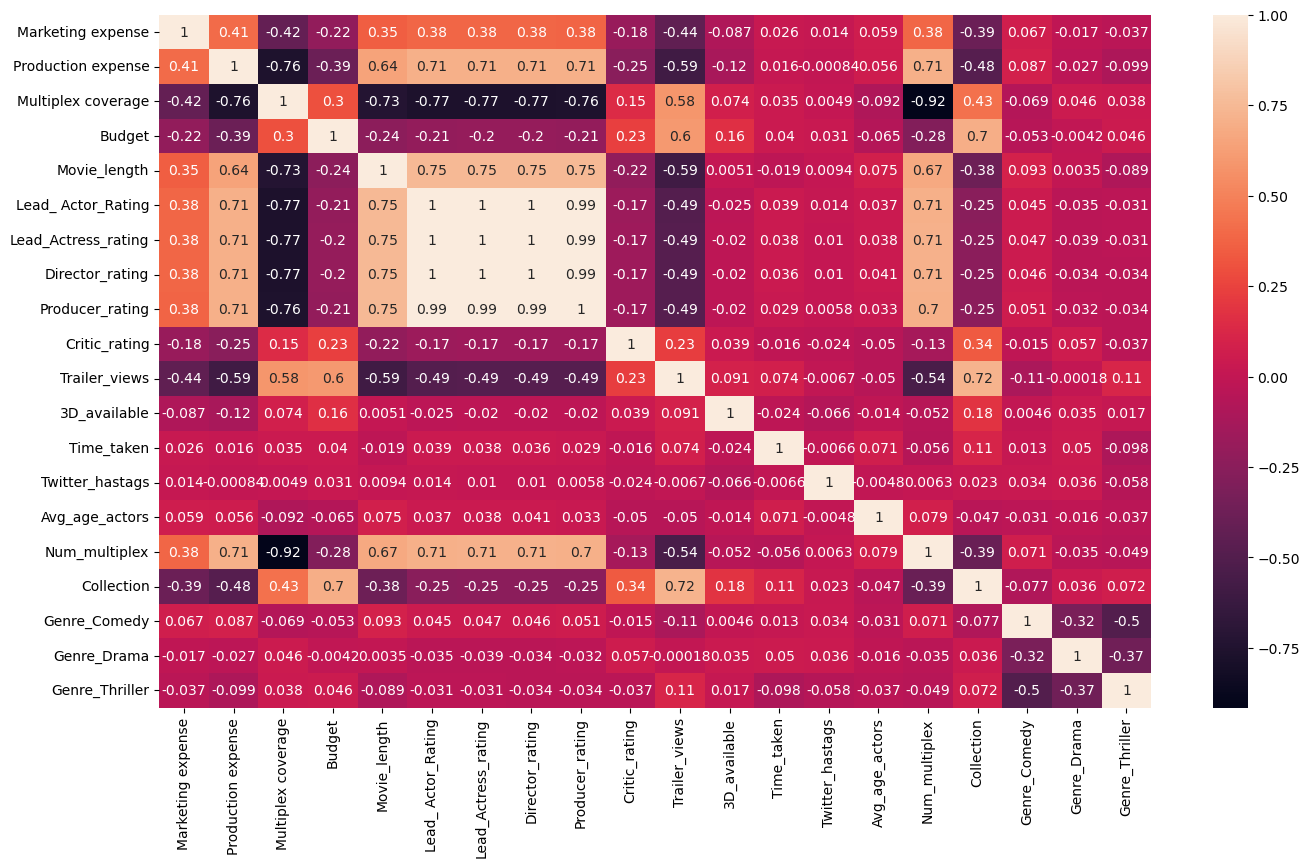

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(data1.corr(),annot=True)
plt.show()

# Model Creation

In [32]:
data1.head(1)

Marketing expense  Production expense  Multiplex coverage    Budget  \
0                0.0            0.067815            0.685185  0.577505   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0      0.641607            0.712243             0.737511         0.728738   

   Producer_rating  Critic_rating  Trailer_views  3D_available  Time_taken  \
0         0.707404       0.478571       0.886108           1.0    0.503862   

   Twitter_hastags  Avg_age_actors  Num_multiplex  Collection  Genre_Comedy  \
0         0.012457        0.350877       0.300935    0.422222           0.0   

   Genre_Drama  Genre_Thriller  
0          0.0             1.0

In [33]:
#Step 1 Independent and dependent variable creation

X = data1.drop("Collection",axis=1)
y = data1.loc[:,['Collection']]

In [34]:
# Step 2 Traning and testing data creation

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
y_test

Collection
226    0.724444
292    0.508889
90     0.391111
373    0.195556
273    0.671111
..          ...
349    0.480000
212    0.386667
156    0.180000
480    0.400000
248    0.433333

[102 rows x 1 columns]

In [36]:
# Step 3 Creating model

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = LR.predict(X_test)
y_pred

array([[ 0.70270738],
       [ 0.576503  ],
       [ 0.58084357],
       [-0.01769459],
       [ 0.65211386],
       [-0.0150524 ],
       [ 0.58178671],
       [ 0.59286135],
       [ 0.5535098 ],
       [ 0.35466715],
       [ 0.63078447],
       [ 0.32319743],
       [ 0.50100771],
       [ 0.61838076],
       [ 0.50253219],
       [ 0.24924473],
       [-0.06073207],
       [ 0.28208095],
       [ 0.21126138],
       [ 0.25134853],
       [ 0.04626708],
       [ 0.34093147],
       [ 0.81410186],
       [ 0.45438523],
       [ 0.46716609],
       [ 0.11191444],
       [ 0.4881714 ],
       [ 0.4099681 ],
       [ 0.48154609],
       [ 0.3578139 ],
       [ 0.24492469],
       [ 0.14702699],
       [ 0.26435842],
       [ 0.3627019 ],
       [ 0.49366557],
       [ 0.31954886],
       [ 0.48958006],
       [ 0.1931165 ],
       [ 0.77001307],
       [ 0.66902639],
       [ 0.36042598],
       [ 0.01665944],
       [ 0.53712614],
       [ 0.15913005],
       [ 0.42885395],
       [ 0

In [38]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score = r2_score(y_test,y_pred)
r2score

0.71205265143834

In [39]:
adjusted_r2 = 1-(1-0.71)*(104-17)/(104-17-1)
adjusted_r2

0.7066279069767442

In [40]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred)))

0.01118793378813848
0.1057730295875961


In [41]:
print(mean_absolute_error(y_test,y_pred))

0.08271277734975474


# decision tree

In [42]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth = 3)

DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [43]:
y_train_pred =DT.predict(X_train)
y_test_pred = DT.predict(X_test)

In [44]:
y_train_pred

array([0.28167959, 0.92      , 0.14998179, 0.40594473, 0.14998179,
       1.        , 0.40594473, 0.40594473, 0.40594473, 0.40594473,
       0.14998179, 0.63381944, 0.28167959, 0.28167959, 0.40594473,
       0.28167959, 0.28167959, 0.40594473, 0.40594473, 0.63381944,
       0.40594473, 0.40594473, 0.40594473, 0.40594473, 0.40594473,
       0.28167959, 0.40594473, 0.92      , 0.92      , 0.40594473,
       0.14998179, 0.28167959, 0.14998179, 0.40594473, 0.14998179,
       0.14998179, 0.40594473, 0.40594473, 0.40594473, 0.28167959,
       0.40594473, 0.40594473, 0.63381944, 1.        , 0.40594473,
       0.40594473, 0.40594473, 0.40594473, 0.28167959, 0.63381944,
       0.14998179, 0.14998179, 0.40594473, 0.63381944, 0.28167959,
       0.40594473, 0.63381944, 0.63381944, 0.28167959, 0.63381944,
       0.28167959, 0.40594473, 0.40594473, 0.28167959, 0.28167959,
       0.14998179, 0.63381944, 0.40594473, 0.40594473, 0.28167959,
       0.28167959, 0.28167959, 0.14998179, 0.40594473, 0.40594

In [45]:
# model evolution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score = r2_score(y_train,y_train_pred)
r2score

0.8311804572860655

In [46]:
r2score1 = r2_score(y_test,y_test_pred)
r2score1

0.5394081813952019